### Import TensorFlow, matplotlib and MNIST dataset.

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

### Visualisation.

7


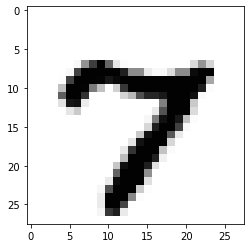

In [23]:
image_index = 5473
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

### Size of the image.

In [18]:
x_train.shape

(60000, 28, 28)

### Building the Model

In [20]:
input = tensorflow.keras.layers.Input(shape = (28,28))
x = tensorflow.keras.layers.LSTM(64, activation = "relu")(input)
out = tensorflow.keras.layers.Dense(10, activation = "softmax")(x)
model = tf.keras.models.Model(input, out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                23808     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [21]:
model.compile(optimizer  ="adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
fitted_model = model.fit(x_train, y_train, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5686 - acc: 0.8132
Epoch 2/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1620 - acc: 0.9513
Epoch 3/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1114 - acc: 0.9666
Epoch 4/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0893 - acc: 0.9731
Epoch 5/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0728 - acc: 0.9781
Epoch 6/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0622 - acc: 0.9809
Epoch 7/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0554 - acc: 0.9827
Epoch 8/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0473 - acc: 0.9854
Epoch 9/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0434 - acc: 0.9865
Epoch 10/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0391 - acc: 0.9876
Epoch 11/

### Evaluating the Model.

In [22]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: {0}, Accuracy: {1}".format(loss, accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0420 - acc: 0.9888
Loss: 0.04199618101119995, Accuracy: 0.9887999892234802


Here we can see that we have acheived 98.88% accuracy.